## **Import Libraries**

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

# **Stage 1**

## **Data Setup & Preview** 

In [25]:
data_path = Path.home()/'notebooks/programming/data/watch_bot'
csv_path = Path.home()/'notebooks/programming/projects/watch_bot/data_prep/file_attribs.csv'

In [26]:
df = pd.read_csv(csv_path)
df = df[['name', 'dial_visibility']]
df = df.astype({'dial_visibility':'int'})
df.head(), df.dtypes

(                                                name  dial_visibility
 0  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 1  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 2  nomos_1/nomos/_without_model/nomos_@_the_loupe...                0
 3  nomos_1/nomos/_without_model/nomos_beta_11156_...                1
 4  nomos_1/nomos/_without_model/nomos_beta_11156_...                1,
 name               object
 dial_visibility     int64
 dtype: object)

In [68]:
bs = 64
img_size = 128
xform = get_transforms(flip_vert=True)

In [65]:
src = (ImageList.from_df(df, data_path)
        .split_by_rand_pct()
        .label_from_df())

In [81]:
data = (src.transform(tfms=xform, size=img_size, padding_mode='border')
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [82]:
print(f'{data.train_ds}\n\n{data.valid_ds}')


LabelList (9579 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,0,1,1
Path: /home/neronicolo/notebooks/programming/data/watch_bot

LabelList (2394 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,0,0,1,1
Path: /home/neronicolo/notebooks/programming/data/watch_bot


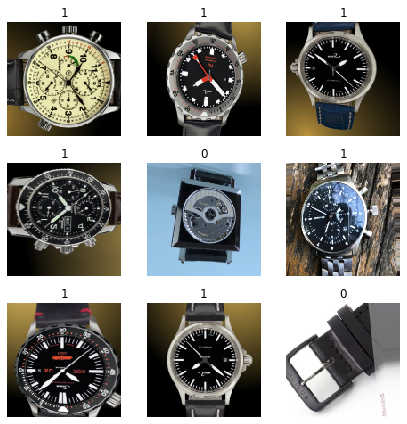

In [109]:
data.show_batch(rows=3, figsize=(6,6))

In [110]:
# TODO: resize before training - https://docs.fast.ai/vision.transform.html#resize
# look at https://nbviewer.jupyter.org/github/rsomani95/shot-type-classifier/blob/master/methodology.ipynb#Defining-Data-Transformations----

## **Training**